<a href="https://colab.research.google.com/github/ewinge1/ewinge1.github.io/blob/master/MLPresentationCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

In [1]:
import urllib
%matplotlib inline
from IPython.display import HTML
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/CC-MNNIT/2018-19-Classes/master/MachineLearning/2018_08_22_Logical-Rhythm-2/data.csv", "data.csv")
import torch

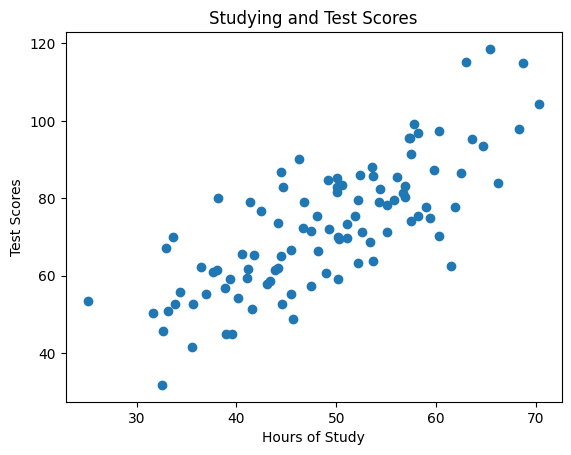

In [2]:
# Grab data from the dataset
data = genfromtxt('data.csv', delimiter=',')
x = array(data[:, 0])
y = array(data[:, 1])

# Make a scatter plot of the data
plt.scatter(x, y)
plt.xlabel('Hours of Study')
plt.ylabel('Test Scores')
plt.title('Studying and Test Scores')
plt.savefig("scatter.pdf")
plt.show()

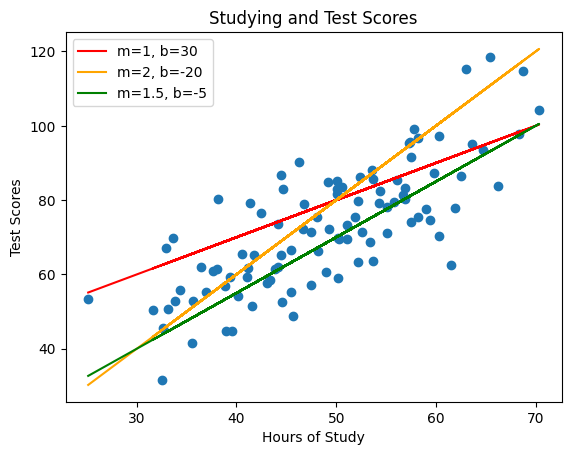

In [3]:
# Try 3 random-ish lines to compare their fit
m1, b1 = 1, 30
m2, b2 = 2, -20
m3, b3 = 1.5, -5

# Re-plot with the lines added over top
plt.scatter(x, y)
plt.plot(x, m1*x + b1, label='m=1, b=30', color='red')
plt.plot(x, m2*x + b2, label='m=2, b=-20', color='orange')
plt.plot(x, m3*x + b3, label='m=1.5, b=-5', color='green')
plt.legend()
plt.xlabel('Hours of Study')
plt.ylabel('Test Scores')
plt.title('Studying and Test Scores')
plt.savefig('LinRegOptions.pdf')
plt.show()

In [4]:
def mse(y, y_pred):
  return np.mean((y-y_pred)**2)

y_pred_1 = m1*x + b1
y_pred_2 = m2*x + b2
y_pred_3 = m3*x + b3

print(mse(y, y_pred_1), mse(y, y_pred_2), mse(y, y_pred_3))

158.763504444591 180.2813488440467 131.69143314023685


In [5]:
def lin_reg(x, params):
  m, b = params
  return m*x + b

def mse_torch(y, y_pred):
  return torch.mean((y-y_pred)**2)

params = torch.zeros(2).requires_grad_()
epochs = 10000
for e in range(epochs):
  preds = lin_reg(torch.tensor(x), params)
  loss = mse_torch(torch.tensor(y), preds)
  loss.backward()
  lr = 1.0e-6
  params.data -= lr * params.grad.data
  params.grad = None


In [6]:
params.data

tensor([1.4788, 0.0351])

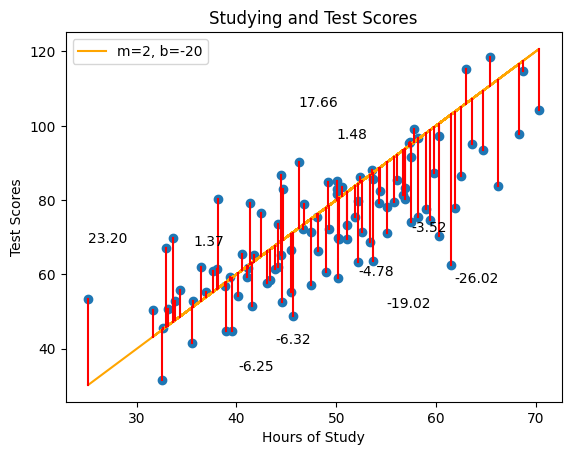

In [7]:
# Compare MSE for a given line m=2, b=-20
m2, b2 = 2, -20

plt.scatter(x, y)
plt.plot(x, m2*x + b2, label='m=2, b=-20', color='orange')
for i in range(len(x)):
  plt.plot([x[i], x[i]], [y[i], m2*x[i]+b2], color='red')
sorted_vals = sorted(zip(x, y))
sorted_x = [v[0] for v in sorted_vals]
sorted_y = [v[1] for v in sorted_vals]
for i in range(0, len(x), 10):
  if sorted_y[i] < m2*sorted_x[i] + b2:
    plt.text(sorted_x[i], sorted_y[i] - 20, '{:.2f}'.format(sorted_y[i] - (m2*sorted_x[i]+b2)))
  else:
    plt.text(sorted_x[i], sorted_y[i] + 15, '{:.2f}'.format(sorted_y[i] - (m2*sorted_x[i]+b2)))
plt.legend()
plt.xlabel('Hours of Study')
plt.ylabel('Test Scores')
plt.title('Studying and Test Scores')
plt.savefig('linregwerror.pdf')
plt.show()

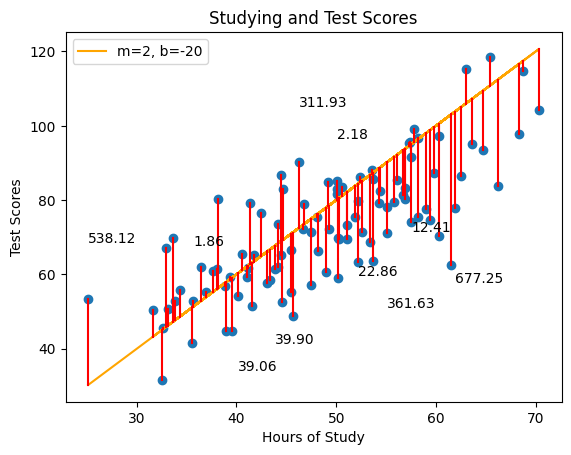

In [8]:
m2, b2 = 2, -20

plt.scatter(x, y)
plt.plot(x, m2*x + b2, label='m=2, b=-20', color='orange')
for i in range(len(x)):
  plt.plot([x[i], x[i]], [y[i], m2*x[i]+b2], color='red')
sorted_vals = sorted(zip(x, y))
sorted_x = [v[0] for v in sorted_vals]
sorted_y = [v[1] for v in sorted_vals]
for i in range(0, len(x), 10):
  if sorted_y[i] < m2*sorted_x[i] + b2:
    plt.text(sorted_x[i], sorted_y[i] - 20, '{:.2f}'.format((sorted_y[i] - (m2*sorted_x[i]+b2))**2))
  else:
    plt.text(sorted_x[i], sorted_y[i] + 15, '{:.2f}'.format((sorted_y[i] - (m2*sorted_x[i]+b2))**2))
plt.legend()
plt.xlabel('Hours of Study')
plt.ylabel('Test Scores')
plt.title('Studying and Test Scores')
plt.savefig('linregsqerror.pdf')
plt.show()